In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv", parse_dates = ["Date"])
df["Total Cases"] = df[["Confirmed", "Recovered", "Deaths"]].sum(axis = 1)

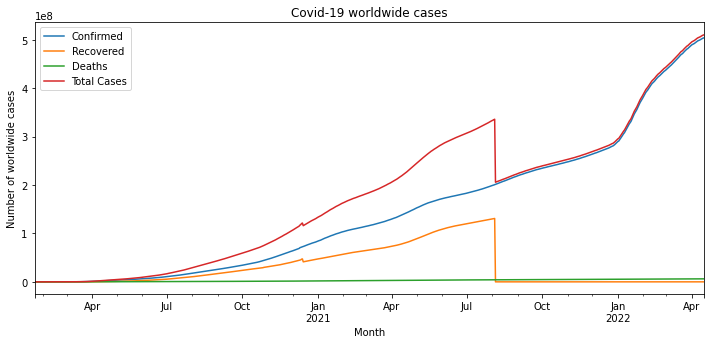

In [2]:
#Worldwide Cases

ww_df = df.groupby(["Date"]).sum()
w = ww_df.plot(figsize = (12,5))
w.set_xlabel("Month")
w.set_ylabel("Number of worldwide cases")
w.title.set_text("Covid-19 worldwide cases")
plt.show()

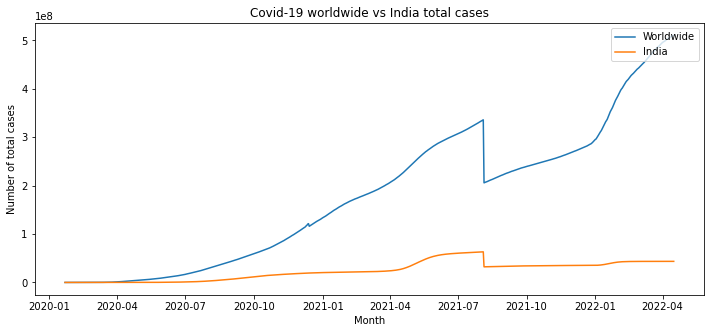

In [3]:
ind_df = df[df["Country"] == "India"].groupby(["Date"]).sum()
fig = plt.figure(figsize = (12,5))
ax = fig.add_subplot(111)
ax.plot(ww_df[["Total Cases"]], label = "Worldwide")
ax.plot(ind_df[["Total Cases"]], label = "India")        
ax.set_xlabel("Month")
ax.set_ylabel("Number of total cases")
ax.title.set_text("Covid-19 worldwide vs India total cases")
plt.legend(loc = "upper right")
plt.show()

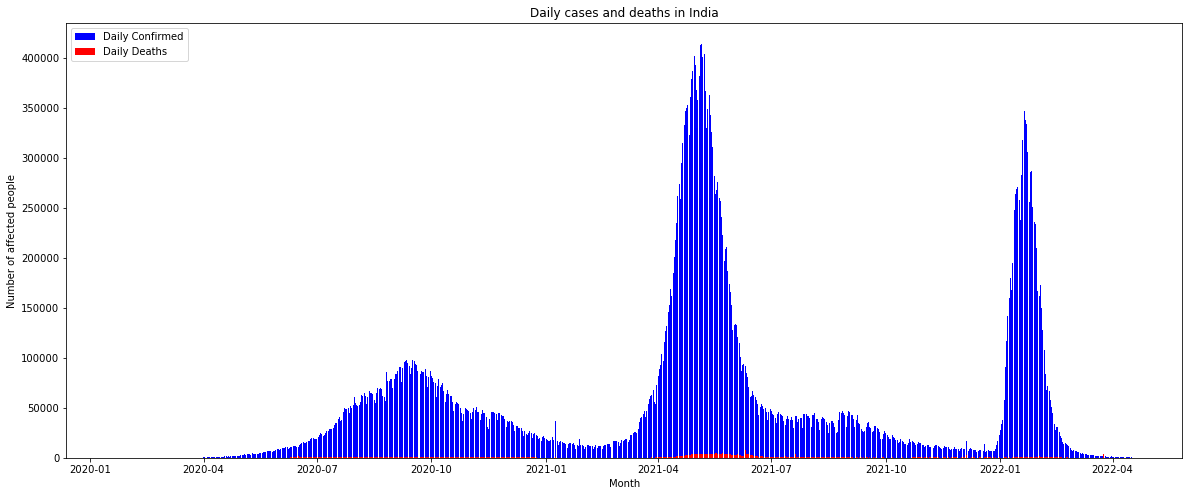

In [4]:
# Cases in India

ind_df = ind_df.reset_index()
ind_df["Daily Confirmed"] = ind_df["Confirmed"].sub(ind_df["Confirmed"].shift())
ind_df["Daily Deaths"] = ind_df["Deaths"].sub(ind_df["Deaths"].shift())

fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(111)
ax.bar(ind_df["Date"], ind_df["Daily Confirmed"], color = "b", label = "Daily Confirmed")
ax.bar(ind_df["Date"], ind_df["Daily Deaths"], color = "r", label = "Daily Deaths")
ax.set_xlabel("Month")
ax.set_ylabel("Number of affected people")
ax.title.set_text("Daily cases and deaths in India")
plt.legend(loc = "upper left")
plt.show()

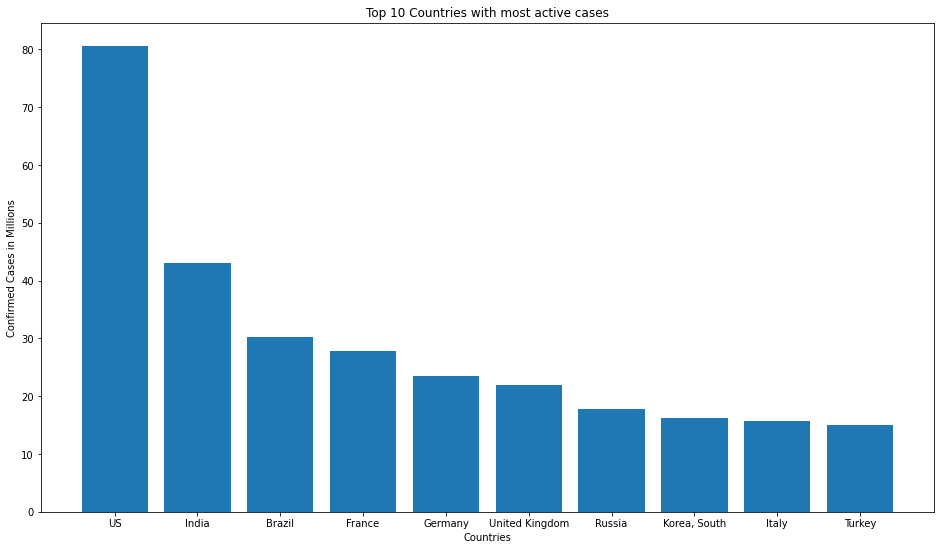

In [36]:
# Top 10 active cases Countries 

top10_active_cases = df.groupby(["Country"]).max()[["Confirmed", "Date"]].sort_values(by = ["Confirmed"], ascending=False).reset_index()
fig = plt.figure(figsize=(16,9))
t = fig.add_subplot(111)
t.bar(top10_active_cases["Country"][:10], top10_active_cases["Confirmed"][:10]/1000000)
t.set_xlabel("Countries")
t.set_ylabel("Confirmed Cases in Millions")
t.title.set_text("Top 10 Countries with most active cases")
plt.show()

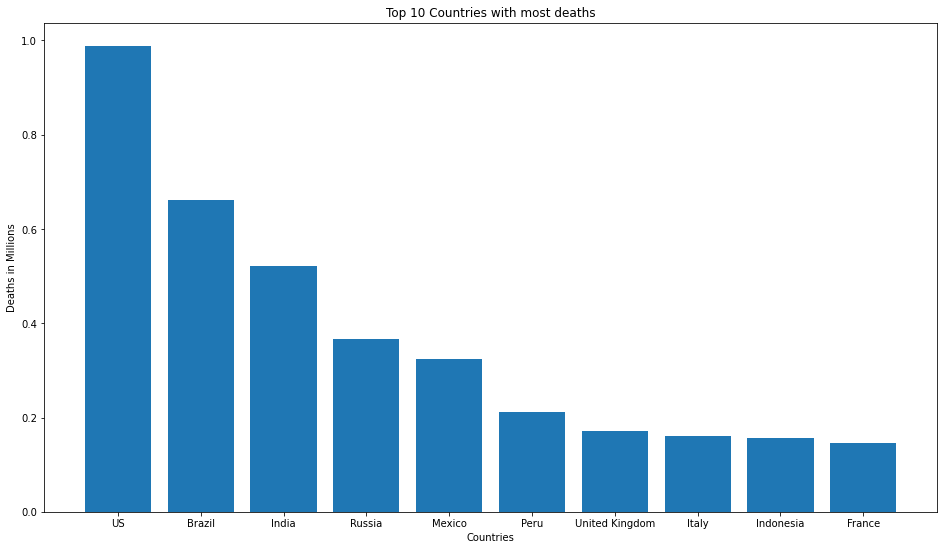

In [37]:
# Top 10 Countries with most Deaths

top10_deaths = df.groupby(["Country"]).max()[["Deaths", "Date"]].sort_values(by = ["Deaths"], ascending=False).reset_index()
fig = plt.figure(figsize=(16,9))
t = fig.add_subplot(111)
t.bar(top10_deaths["Country"][:10], top10_deaths["Deaths"][:10]/1000000)
t.set_xlabel("Countries")
t.set_ylabel("Deaths in Millions")
t.title.set_text("Top 10 Countries with most deaths")
plt.show()